In [3]:
# Import the dependecies:
import pandas as pd
import tensorflow.python as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


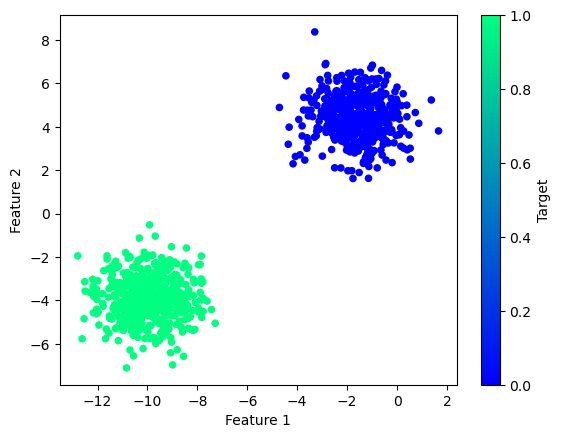

In [4]:
# Build the model from part 2, lesson 1:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2 , n_features=2, random_state=1)

# Next, we continue preprocsessing our data by transforming `y` into a vertical vector, or a single column:
y = y.reshape(-1, 1)

# To visualize the data, we'll create a DataFrame and generate a plot using the `plot` function:
# Create a DataFrame with the dummy data:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plot the dummy data:
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter') 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
# Create the scaler instance:
X_scaler = StandardScaler()

# Fit the scaler:
X_scaler.fit(X_train)

# Scale the data:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

neuron = Sequential()

inputs = 2
hidden_nodes = 3

neuron.add(Dense(units=hidden_nodes, activation='relu', input_dim=inputs))

number_classes = 1 
neuron.add(Dense(units=number_classes, activation='sigmoid'))

neuron.summary()

In [5]:
# COMPILING A NEURAL NETWORK MODEL
# Now that we have defined the structure of a neural network, the next step is to compile the model.
# It might help to think of it this way: Defining the neural network's structure is akin to designing construction plans, and compiling the model is like building the house.
# Recall that in our initial model, we defined a variable calle `neuron` to store our neural network model.
# to compile the model, we use the `compile()` function provided by Keras:
neuron.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# THE LOSS FUNCTION
# The `loss` parameter specifies the LOSS FUNCTION.
# When we train our neural network model on a dataset, we will pass our training dataset thorugh the model multiple times.
# The loss function uses machine learning algorithms to score the performance of the model after each of these iterations.
# This allows us to see how the model's performance changes over each iteration.
# We may determine that the model reaches maximum performance after a particular number of iterations.
# In this demo, we use the `binary_crossentropy` loss function, because it's designed to deal with binary classification problems.
# Many different loss functions exist.
# Which one we use depends on the output we want from our neural network model.
# To learn more about the various functions available through TensorFlow's Keras library, you can refer to the following link:
    # https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [7]:
# THE OPTIMIZER FUNCTION
# The `optimizer` parameter specifies the OPTIMIZATION FUNCTION.
# This function shapes and molds a neural network model while the model is trained on the data.
# This ensures that the model performs to the best of its ability. 
# At a glance, an optimiaztion function reduces the model's losses and provides the most accurate output possible.
# In this demo, we use the `adam` optimizer.
# This optimizer uses a GRADIENT DESCENT approach, which ensures that weaker classifying variables and features will not confuse the model and cause it to return less accurate results.
# Grandient descent is an optimization algorithm.
# Neural networks use it to identify the combination of function parameters that will allow the model to learn as efficiently as possible, until it has learned everything it can.
# When gradient descent works properly, the model learns the greatest amount in th early iterations.
# The amount learned declines with each iteration until the optimization algorithm approaches the local minimum value, or the point where it cannot learn anything additional.
# The number of modle iterations required for the model to learn everything it can varies widely - and is often only discovered through trail and error.
# Just as there are many loss functions, there are several optimizers available in TensorFlow's Keras library. 
# Which optimization function we choose depends on what we want to optimize for in our model.
# We will discuss optimization techniques for neural networks later in the module.

In [8]:
# DEEP DIVE
# You can learn more about the various optimizers that the TensorFlow library provides in the following link:
    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# You can also learn more about the `adam` optimizer from the following link:
    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [9]:
# THE EVALUATION METRICS
# Finally, the `metrics` parameter specifies additional metrics that assess the quality of a neural network.
# There are two main evaluation metrics:
    # 1. MODEL PREDICTIVE ACCURACY
    # 2. MODEL MEAN SQUARED ERROR (MSE)
# We use model predictive accuracy (`accuracy`) for classification models, the highest possible accuracy value is 1.
# A higher accuracy value indicates more accurate predictions.
# However, for regression models, we want the MSE to reduce to zero.
# The closer to 0 our MSE is, the more accurate the model's predictions are.
# You can learn more about the metrics supported by the TensorFlow Keras package in the following link:
    # https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [10]:
# FITTING AND EVALUATING A NEURAL NETWORK
# Now that our neural network is modeled and compiled, we can fit, or train, our model to the dummy data.
# To fit our Keras model, we'll use the `fit` function and provide the X and y training values, as well as the number of epochs.
# In machine learning, an EPOCH is a single pass of the entire training dataset through the model.
# Sometimes an epoch is loosely defined as an iteration of a model.
# When we fit (train) a neural network model, we use the optimizer and loss functions to adjust the weights of each input during each epoch of the training cycle.
# In our code, we will fit our model using 100 epochs
# Fitting the model:
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


24/24 [==============================] - 1s 3ms/step - loss: 0.6712 - accuracy: 0.6013
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7800
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.9693
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.9853
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.9907
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.9933
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.9947
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.9960
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.9987
Epoch 1

In [11]:
# As the preceding output shows, while the model is fit, the results of both the loss function and the accuracy function are displayed after each epoch.
# Note that we store the training results on the `model` variable.
# Although we follow the model-fit-predict pattern, it is common to evaluate a neural network model after it's fitted, but before using it to make predictions.
# Next, we will learn some techniques to assess the accuracy of a model.

<AxesSubplot:>

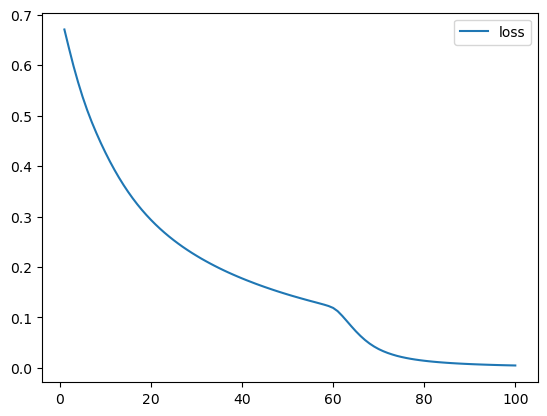

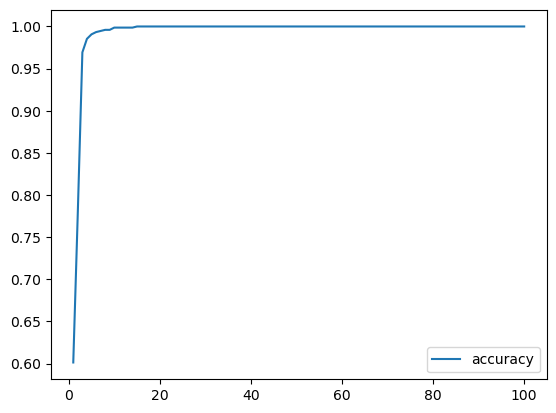

In [13]:
# PLOTTING THE LOSS AND ACCURACY
# After the training cycle ends, we can visually evaluate the model by plotting the loss function and the accuracy across all epochs.
# To create the plots, we first create a DataFrame using the `history` dictionary of the training results stored on the `model` variable.

# NOTE:
# Because the training reuslts are stored on the `model` variable, we can access the dictionary by only adding `.history`.

# This dictionary stores the loss and accuracy results of all epochs.

# Create a DataFrame with the history dictionary:
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))
 
# Plot the loss:
df.plot(y='loss')
                  
# Plot the accuracy:
df.plot(y='accuracy')                  

In [14]:
# BREAKDOWN
# We can use loss and accuracy plots to assess how a model's performance changes as the number of epochs increases.
# In order to conclude that a model's performance increases as it progresses through more epochs, the model's accuracy should tend toward 1, and its loss should tend toward 0.
# We can also use these plots to compare how well different models perform when solving the same problem.
# But for now, let's continue evaluating our single model.
# We have analyzed its loss and accuracy visually.
# Next, we'll evaluate the model's performance quantitatively.

In [15]:
# EVALUATING THE MODEL'S PERFORMANCE
# Now that our model has been properly trained, we can evaluate its performance using the test data.
# Testing a neural network model in TensorFlow is similar to testing a machine learning model in scikit-learn.
# For this demonstration, we'll use the `evaluate` function.
# Then, we'll print the testing loss and accuracy values.

# Evaluate the model using testing data:
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results:
print(f'Loss: {model_loss}, Accuracy {model_accuracy}.')

8/8 - 0s - loss: 0.0048 - accuracy: 1.0000 - 235ms/epoch - 29ms/step
Loss: 0.004823795519769192, Accuracy 1.0.


In [16]:
# BREAKDOWN
# As the preceding image shows, the returned testing loss value is about 0.0048.
# The testing accuracy is 1.00.
# These performance metrics tell us that our neural network model correctly classified all of the test data points.
# In other words, the model correctly classified data that it was not trained on 100% of the time.
# Perfect model performance is always ideal.
# But for complex models tahta learn from complex datasets, achieving an accuracy of 100% may not be possible.
# Therefore, it's important to establish performance thresholds before designing any machine learning model.
# Depending on the type of data and the use case, we may have to re-create and retrain a model using different parameters, or different training/test data, to achieve our performance threshold.
# Or, we may have to consider using a different model entirely.

# NOTE:
# Later in the module, we'll learn some strategies for improving a model's performance.

In [17]:
# MAKING PREDICTIONS WITH A NEURAL NETWORK MODEL
# The next step in the process is making predictions.
# Now that we have trained the model, and verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of data points.
# We can apply this model to novel datasets and predict the classification of data points.
# Using our neural network model, we can use the `predict` function with the data and a threshold of 0.5.
# Any value under 0.5 is classified as 0 and anything over 0.5 is classified as 1.
# For example, to predict the class of data points within a new dummy data, we can add and run the following code:

# Create 10 new samples of dummy data:
new_X, new_y, = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)

# Make predictions:
predictions = (neuron.predict(new_X) > 0.5).astype('int32')

1/1 [==============================] - 0s 363ms/step


In [19]:
# After the model makes its predictions, we can create a DataFrame that compares the data's predicted versus actual values.

# Create a DataFrame to compare the predictions with the acutal values:
results = pd.DataFrame({'predictions': predictions.ravel(), 'actual': new_y})

# Display the sample data:
display(results.head(10))

,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [20]:
# As the output shows, the model correctly classified all 10 datapoints.